<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/18_CNN_CIFAR10_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#version 2
- 이전 CIFAR10에서는 약 70퍼 대의 정확도를 나왔는데 이번에는 여러 레이어로 정확도를 높일 예정이다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
cifar=tf.keras.datasets.cifar10
(x_train,t_train),(x_test,t_test)=cifar.load_data()

x_train,x_test=x_train/255.,x_test/255.

In [3]:
#이미지 보강 
gen=ImageDataGenerator(rotation_range=20,
                       shear_range=0.2,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       horizontal_flip=True)

augment_ratio=1.5 #전체 데이터의 150%
augment_size=int(augment_ratio*x_train.shape[0])

randidx=np.random.randint(x_train.shape[0],size=augment_size)

x_augmented=x_train[randidx].copy()
t_augmented=t_train[randidx].copy()

x_augmented,t_augmented=gen.flow(x_augmented,t_augmented,
                                 batch_size=augment_size,
                                 shuffle=False).next()

x_train=np.concatenate((x_train,x_augmented))                
t_train=np.concatenate((t_train,t_augmented))   

s=np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train=x_train[s]
t_train=t_train[s]

In [4]:
cnn=Sequential()

cnn.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(256,(3,3),activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [5]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

hist=cnn.fit(x_train,t_train,batch_size=256,epochs=50,validation_data=(x_test,t_test))

Epoch 1/50
489/489 [==============================] - 24s 26ms/step - loss: 1.8064 - accuracy: 0.3184 - val_loss: 1.2837 - val_accuracy: 0.5330
Epoch 2/50
489/489 [==============================] - 12s 25ms/step - loss: 1.3492 - accuracy: 0.5138 - val_loss: 1.1010 - val_accuracy: 0.6061
Epoch 3/50
489/489 [==============================] - 12s 25ms/step - loss: 1.1673 - accuracy: 0.5883 - val_loss: 0.9485 - val_accuracy: 0.6591
Epoch 4/50
489/489 [==============================] - 12s 25ms/step - loss: 1.0455 - accuracy: 0.6350 - val_loss: 0.8107 - val_accuracy: 0.7105
Epoch 5/50
489/489 [==============================] - 12s 25ms/step - loss: 0.9634 - accuracy: 0.6671 - val_loss: 0.8277 - val_accuracy: 0.7091
Epoch 6/50
489/489 [==============================] - 12s 25ms/step - loss: 0.9061 - accuracy: 0.6884 - val_loss: 0.7218 - val_accuracy: 0.7468
Epoch 7/50
489/489 [==============================] - 12s 25ms/step - loss: 0.8647 - accuracy: 0.7041 - val_loss: 0.6734 - val_accuracy:

In [6]:
cnn.evaluate(x_test,t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.8538


[0.44855424761772156, 0.8537999987602234]

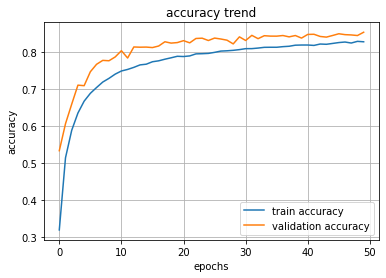

In [7]:
plt.title('accuracy trend')

plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')

plt.show()

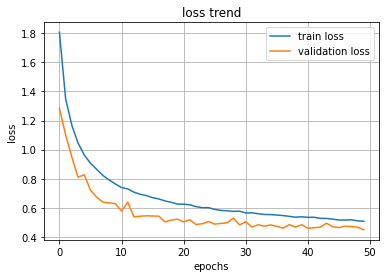

In [8]:
plt.title('loss trend')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')

plt.show()